In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [2]:
np.random.seed(42)
n = 200  # number of sample patients

data = pd.DataFrame({
    'Patient_ID': range(1, n+1),
    'Persistency_Flag': np.random.choice([0,1], size=n, p=[0.4,0.6]),
    'Age': np.random.randint(30, 85, size=n),
    'Race': np.random.choice(['White','Black','Asian','Other'], size=n),
    'Region': np.random.choice(['North','South','East','West'], size=n),
    'Ethnicity': np.random.choice(['Hispanic','Not Hispanic'], size=n),
    'Gender': np.random.choice(['M','F'], size=n),
    'IDN_Indicator': np.random.choice([0,1], size=n),
    'NTM_Physician_Specialty': np.random.choice(['Orthopedic','Endocrinologist','General'], size=n),
    'NTM_T_Score': np.round(np.random.uniform(-3, 3, size=n),2),
    'Change_in_T_Score': np.random.choice(['Worsened','Remained Same','Improved','Unknown'], size=n),
    'NTM_Risk_Segment': np.random.choice(['Low','Medium','High'], size=n),
    'Change_in_Risk_Segment': np.random.choice(['Worsened','Remained Same','Improved','Unknown'], size=n),
    'NTM_Multiple_Risk_Factors': np.random.choice([0,1], size=n),
    'NTM_Dexa_Scan_Frequency': np.random.randint(0,5,size=n),
    'NTM_Dexa_Scan_Recency': np.random.choice([0,1], size=n),
    'Dexa_During_Therapy': np.random.choice([0,1], size=n),
    'NTM_Fragility_Fracture_Recency': np.random.choice([0,1], size=n),
    'Fragility_Fracture_During_Therapy': np.random.choice([0,1], size=n),
    'NTM_Glucocorticoid_Recency': np.random.choice([0,1], size=n),
    'Glucocorticoid_Usage_During_Therapy': np.random.choice([0,1], size=n),
    'NTM_Injectable_Experience': np.random.choice([0,1], size=n),
    'NTM_Risk_Factors': np.random.randint(0,4, size=n),
    'NTM_Comorbidity': np.random.randint(0,3, size=n),
    'NTM_Concomitancy': np.random.randint(0,4, size=n),
    'Adherence': np.random.uniform(0,1, size=n).round(2)
})

# View first few rows
data.head()

,Patient_ID,Persistency_Flag,Age,Race,Region,Ethnicity,Gender,IDN_Indicator,NTM_Physician_Specialty,NTM_T_Score,...,Dexa_During_Therapy,NTM_Fragility_Fracture_Recency,Fragility_Fracture_During_Therapy,NTM_Glucocorticoid_Recency,Glucocorticoid_Usage_During_Therapy,NTM_Injectable_Experience,NTM_Risk_Factors,NTM_Comorbidity,NTM_Concomitancy,Adherence
0,1,0,53,White,East,Hispanic,M,0,Endocrinologist,0.58,...,1,1,1,1,0,1,2,2,1,0.48
1,2,1,81,Other,North,Not Hispanic,M,0,Orthopedic,0.60,...,1,1,1,0,0,0,1,0,1,0.90
2,3,1,40,White,North,Hispanic,F,0,General,0.99,...,1,0,0,1,0,0,1,1,0,0.67
3,4,1,78,White,South,Hispanic,F,1,General,-1.95,...,0,1,0,1,0,0,3,1,3,0.14
4,5,0,37,White,South,Hispanic,F,1,Orthopedic,2.49,...,1,0,0,0,1,1,0,1,2,0.99


In [3]:
print("Shape of data:", data.shape)
print("Missing values:\n", data.isnull().sum())
print("\nTarget distribution:\n", data['Persistency_Flag'].value_counts())

Shape of data: (200, 26)
Missing values:
 Patient_ID                             0
Persistency_Flag                       0
Age                                    0
Race                                   0
Region                                 0
Ethnicity                              0
Gender                                 0
IDN_Indicator                          0
NTM_Physician_Specialty                0
NTM_T_Score                            0
Change_in_T_Score                      0
NTM_Risk_Segment                       0
Change_in_Risk_Segment                 0
NTM_Multiple_Risk_Factors              0
NTM_Dexa_Scan_Frequency                0
NTM_Dexa_Scan_Recency                  0
Dexa_During_Therapy                    0
NTM_Fragility_Fracture_Recency         0
Fragility_Fracture_During_Therapy      0
NTM_Glucocorticoid_Recency             0
Glucocorticoid_Usage_During_Therapy    0
NTM_Injectable_Experience              0
NTM_Risk_Factors                       0
NTM_Comorbidity

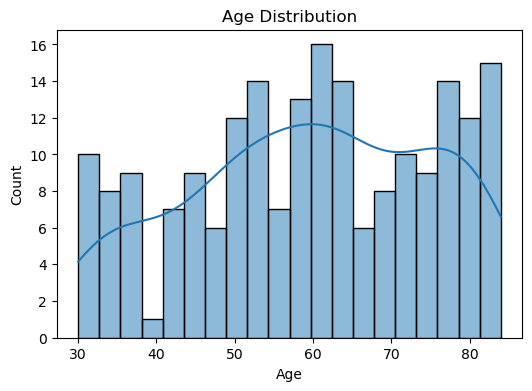

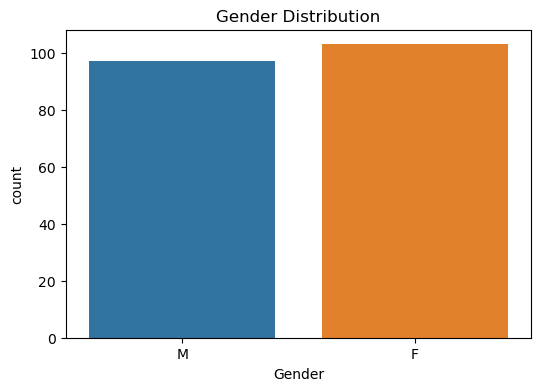

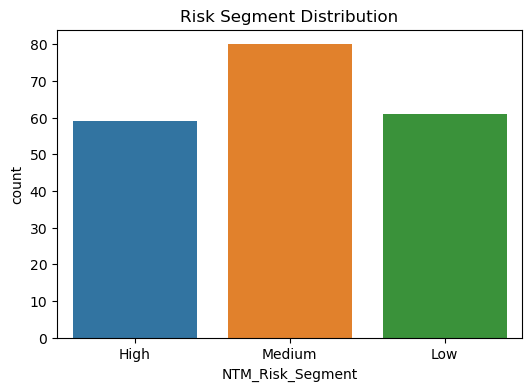

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(data['Age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

# Risk Segment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='NTM_Risk_Segment', data=data)
plt.title('Risk Segment Distribution')
plt.show()


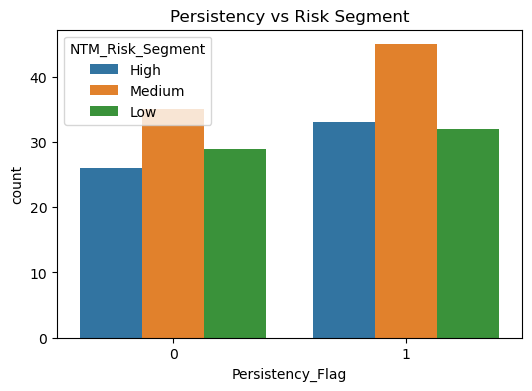

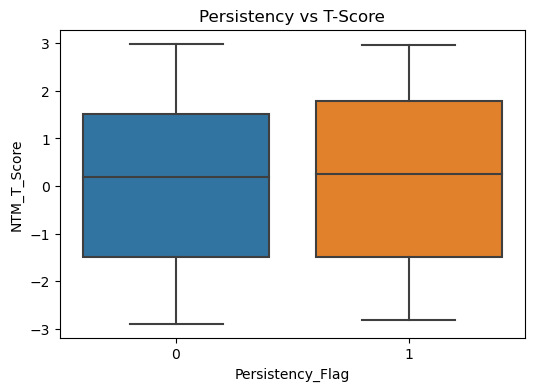

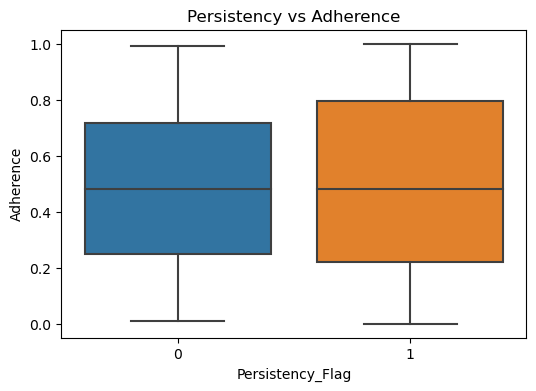

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Persistency_Flag', hue='NTM_Risk_Segment', data=data)
plt.title('Persistency vs Risk Segment')
plt.show()

# Persistency vs T-Score
plt.figure(figsize=(6,4))
sns.boxplot(x='Persistency_Flag', y='NTM_T_Score', data=data)
plt.title('Persistency vs T-Score')
plt.show()

# Persistency vs Adherence
plt.figure(figsize=(6,4))
sns.boxplot(x='Persistency_Flag', y='Adherence', data=data)
plt.title('Persistency vs Adherence')
plt.show()

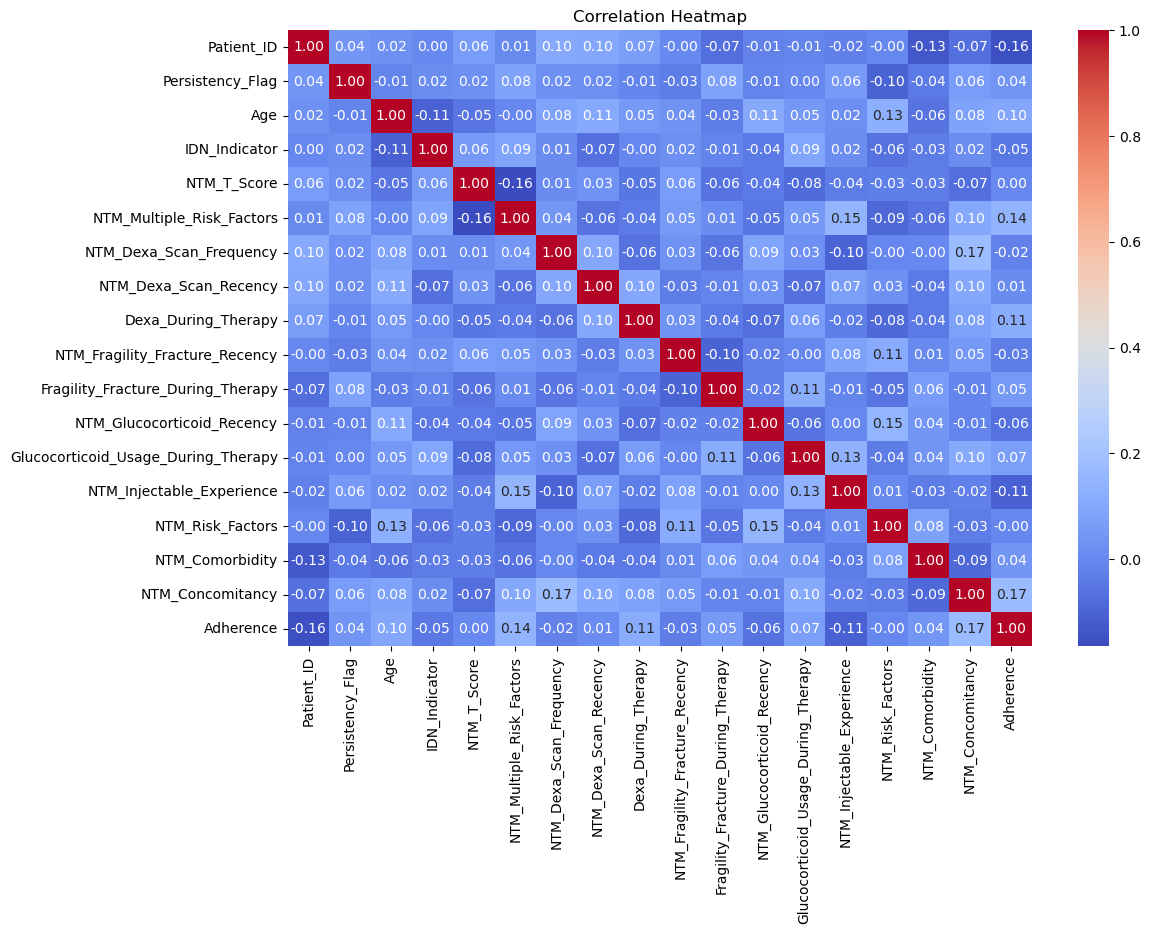

In [6]:
numeric_cols = data.select_dtypes(include=np.number).columns.tolist()
corr = data[numeric_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
categorical_cols = ['Race','Region','Ethnicity','Gender','NTM_Physician_Specialty',
                    'Change_in_T_Score','NTM_Risk_Segment','Change_in_Risk_Segment']

data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [8]:
X = data_encoded.drop(['Patient_ID','Persistency_Flag'], axis=1)
y = data_encoded['Persistency_Flag']

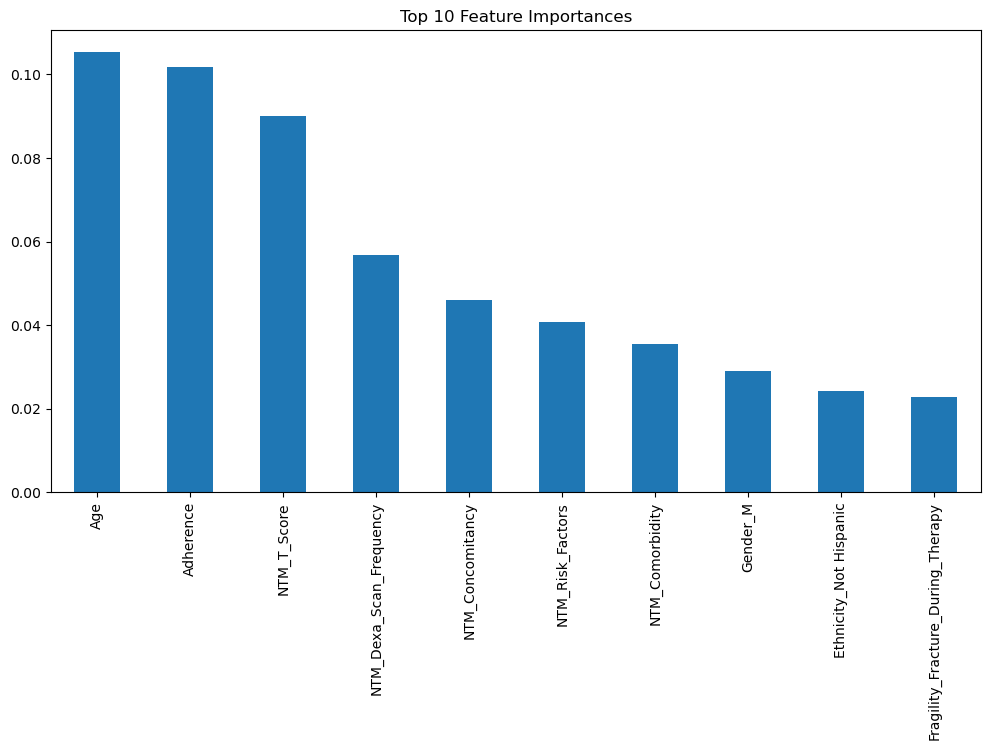

Top 10 Features:
 Age                                  0.105297
Adherence                            0.101688
NTM_T_Score                          0.089965
NTM_Dexa_Scan_Frequency              0.056845
NTM_Concomitancy                     0.045986
NTM_Risk_Factors                     0.040643
NTM_Comorbidity                      0.035412
Gender_M                             0.029077
Ethnicity_Not Hispanic               0.024122
Fragility_Fracture_During_Therapy    0.022722
dtype: float64


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
importances[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()

# Display top 10 features
print("Top 10 Features:\n", importances[:10])


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (160, 34) Test shape: (40, 34)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Example for Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# Random Forest Example
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

Accuracy: 0.525
Precision: 0.5555555555555556
Recall: 0.6818181818181818
ROC-AUC: 0.5883838383838383
Random Forest Accuracy: 0.5
Random Forest ROC-AUC: 0.5176767676767677
